## Practical Example for Linear Regression 

### Loading the Libraries

In [1]:
# Import pandas, numpy, matplotlib, seaborn, sklearn
import numpy as np

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

sns.set()

from sklearn.linear_model import LinearRegression

### Loading Raw Data

In [2]:
data = pd.read_csv('1.04. Real-life example.csv')
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


### Preprocessing

### Exploring the descriptive statistics of the variables

In [3]:
data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


#### Determining the variables of intrest

In [4]:
data = data.drop(["Model"], axis=1)
data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with missing values

In [5]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [6]:
data_no = data.dropna(axis=0)

In [7]:
data_no.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring the PDFs

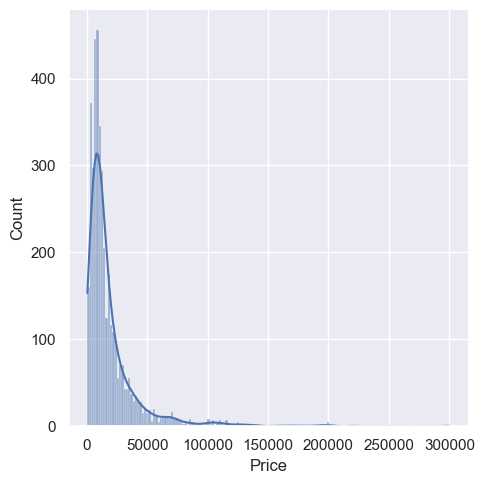

In [8]:
sns.displot(data_no["Price"],kde=True)

### Dealing with Outliers

In [9]:
q = data_no['Price'].quantile(0.99)
data_1 = data_no[data_no['Price'] < q]
data_1.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


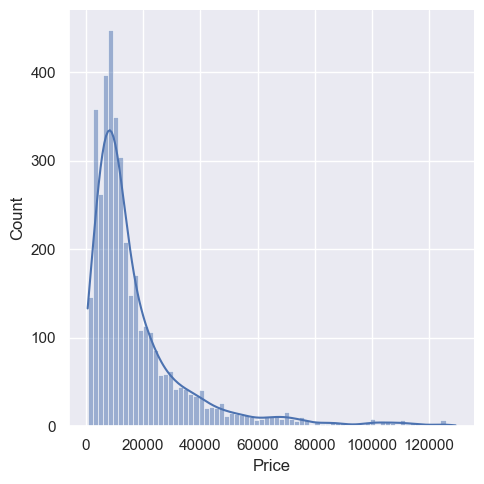

In [10]:
sns.displot(data_1["Price"],kde=True)

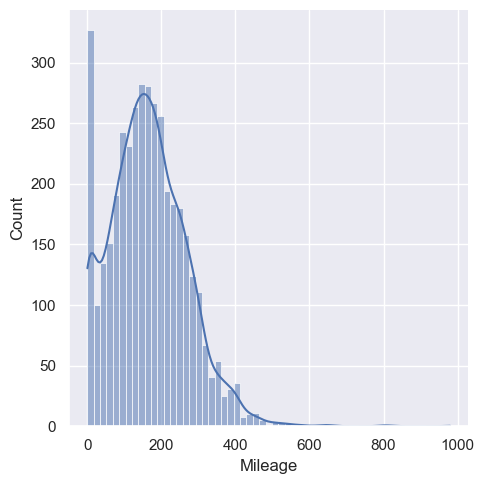

In [11]:
sns.displot(data_1["Mileage"],kde=True)

In [12]:
q = data_no['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage'] < q]
data_2.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3943,3943.000000,3943,3943.000000,3943.000000,3943,3943,3943.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1510,NaN,NaN,1825,3575,NaN
mean,NaN,17936.780614,NaN,161.414659,2.747497,NaN,NaN,2006.393102
std,NaN,19009.750360,NaN,95.940408,4.981033,NaN,NaN,6.593870
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21417.500000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


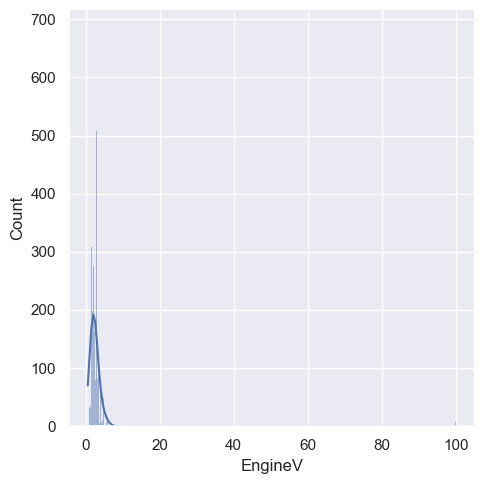

In [13]:
sns.displot(data_2["EngineV"],kde=True)

In [14]:
data_3 =  data_2[data_2['EngineV'] <= 6.5]
data_3.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3921,3921.000000,3921,3921.000000,3921.000000,3921,3921,3921.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1499,NaN,NaN,1818,3559,NaN
mean,NaN,17995.817383,NaN,161.209640,2.444338,NaN,NaN,2006.409589
std,NaN,19042.827255,NaN,95.968718,0.948337,NaN,NaN,6.592942
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.000000,NaN,229.000000,3.000000,NaN,NaN,2012.000000


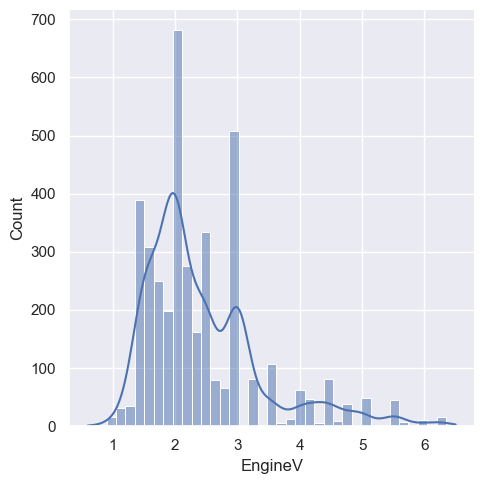

In [15]:
sns.displot(data_3["EngineV"],kde=True)

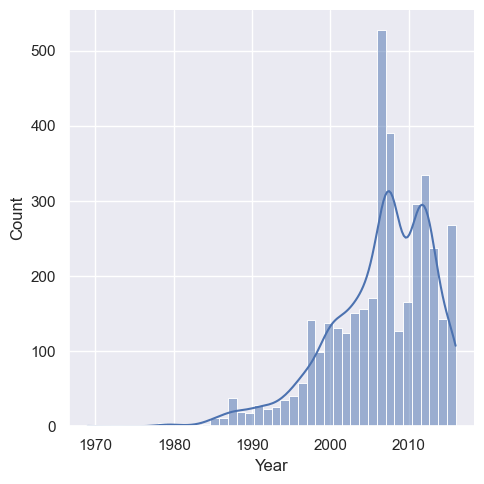

In [16]:
sns.displot(data_3["Year"],kde=True)

In [17]:
q = data_3["Year"].quantile(0.01)
data_4 = data_3[data_3['Year'] > q]

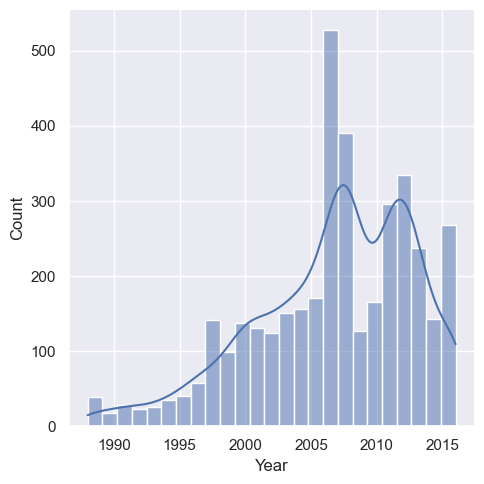

In [18]:
sns.displot(data_4["Year"],kde=True)

In [19]:
data_cleaned =  data_4

### Checking the OLS assumptions

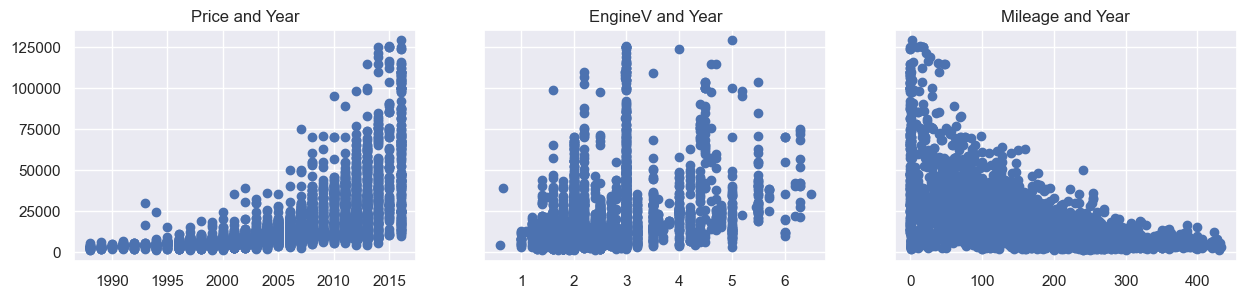

In [20]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned["Year"], data_cleaned["Price"])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned["EngineV"], data_cleaned["Price"])
ax2.set_title('EngineV and Year')
ax3.scatter(data_cleaned["Mileage"], data_cleaned["Price"])
ax3.set_title('Mileage and Year')

plt.show()

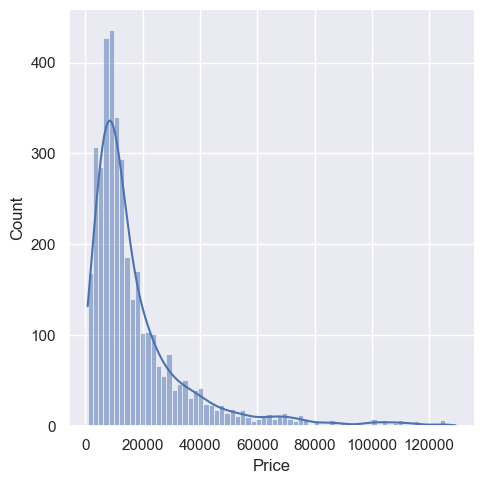

In [21]:
sns.displot(data_cleaned["Price"], kde=True)

### Log Tranformation

In [22]:
log_price =  np.log(data_cleaned["Price"])
data_cleaned["Log Price"] = log_price
data_cleaned.head()

C:\Users\Kishore\AppData\Local\Temp\ipykernel_14440\4199563410.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned["Log Price"] = log_price


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Log Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


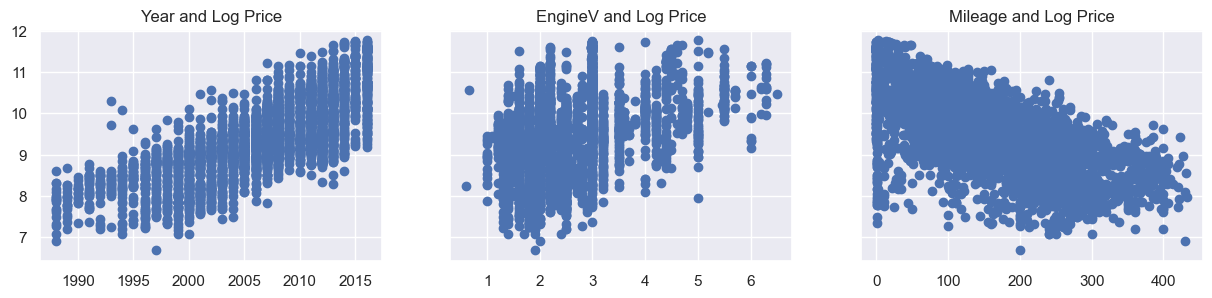

In [23]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned["Year"], data_cleaned["Log Price"])
ax1.set_title('Year and Log Price')
ax2.scatter(data_cleaned["EngineV"], data_cleaned["Log Price"])
ax2.set_title('EngineV and Log Price')
ax3.scatter(data_cleaned["Mileage"], data_cleaned["Log Price"])
ax3.set_title('Mileage and Log Price')

plt.show()

In [24]:
data_cleaned =  data_cleaned.drop(["Price"], axis=1)

### Multi Colinearity

In [25]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Log Price'], dtype=object)

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned[["Mileage", "EngineV", "Year"]]
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [27]:
variables = data_cleaned[["Mileage", "EngineV", "Year"]]

# Computing VIF
vif = pd.DataFrame()
vif["features"] = variables.columns
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

In [28]:
vif

,features,VIF
0,Mileage,3.795037
1,EngineV,7.636536
2,Year,10.338236


In [29]:
data_no_multicollienearity  = data_cleaned.drop(["Year"], axis=1)

### Create Dummy Variables

In [30]:
data_with_dummies = pd.get_dummies(data_no_multicollienearity, drop_first=True)
data_with_dummies.head()

,Mileage,EngineV,Log Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


### Rearrange bit

In [33]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'Log Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [34]:
cols = ['Log Price', 'Mileage', 'EngineV',  'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'] 

In [35]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,Log Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.974618,427,2.9,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.495519,358,5.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.043249,240,4.2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.814656,120,2.0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


## Linear Regression

### Declare the input and the target

In [38]:
targets = data_preprocessed["Log Price"]
inputs = data_preprocessed.drop(["Log Price"], axis=1)

### Scale the data

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [40]:
inputs_scaled = scaler.transform(inputs)

### Training & Testing dataset

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create Liner Regression

In [48]:
x_train.shape

(3093, 17)

In [ ]:
x_train.shape

In [49]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [50]:
y_hat = reg.predict(x_train)

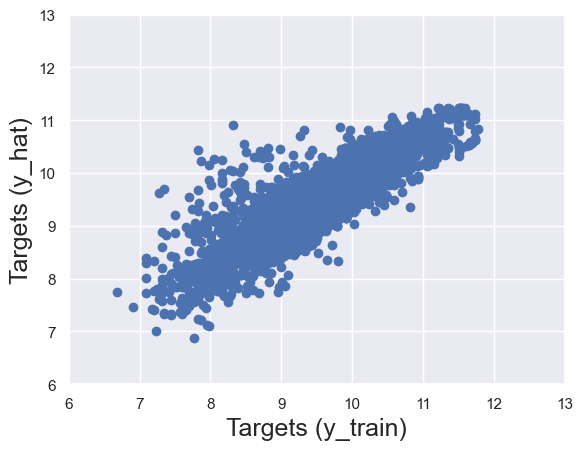

In [51]:
plt.scatter(y_train, y_hat)
plt.xlabel("Targets (y_train)", size=18)
plt.ylabel("Targets (y_hat)", size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

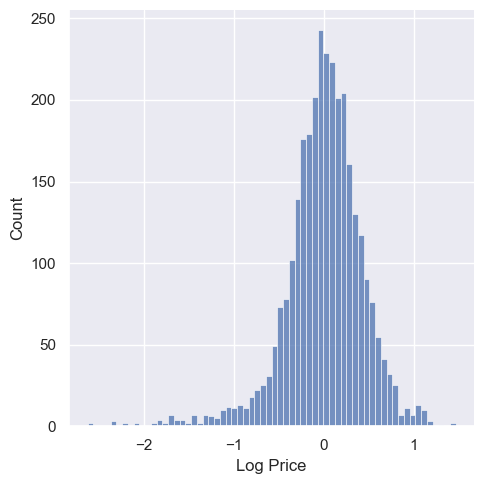

In [52]:
sns.displot(y_train-y_hat)

In [53]:
reg.score(x_train, y_train)

0.7503937634345683

### Finding the Weight and bias

In [54]:
reg.intercept_

np.float64(9.418237837733066)

In [55]:
reg.coef_

array([-0.45581098,  0.21246986,  0.01673541,  0.01623356, -0.13720685,
       -0.18148015, -0.05837072, -0.0869689 , -0.14466029, -0.0982581 ,
       -0.19890064, -0.12187841, -0.16545688, -0.12212884, -0.03045323,
       -0.14981834,  0.32069334])

In [58]:
len(inputs.columns.values)

17

In [59]:
Coef  =  pd.DataFrame()
Coef["Features"] = inputs.columns.values
Coef["Weights"] = reg.coef_
Coef.head(20)

,Features,Weights
0,Mileage,-0.455811
1,EngineV,0.212470
2,Brand_BMW,0.016735
3,Brand_Mercedes-Benz,0.016234
4,Brand_Mitsubishi,-0.137207
5,Brand_Renault,-0.181480
6,Brand_Toyota,-0.058371
7,Brand_Volkswagen,-0.086969
8,Body_hatch,-0.144660
9,Body_other,-0.098258


In [63]:
data_cleaned["Brand"].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [64]:
data_cleaned["Body"].unique()

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

In [65]:
data_cleaned["Engine Type"].unique()

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

### Testing

In [66]:
y_hat_test = reg.predict(x_test)

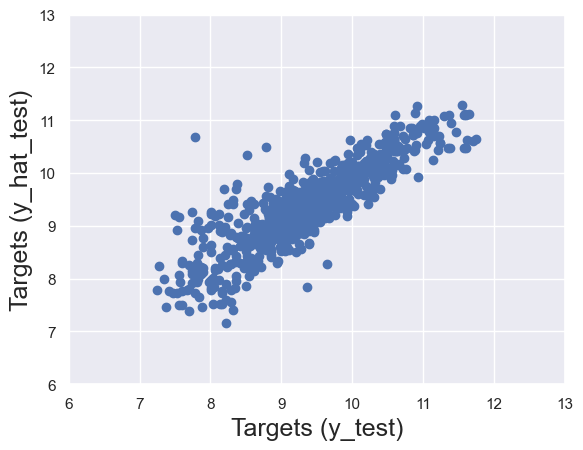

In [67]:
plt.scatter(y_test, y_hat_test)
plt.xlabel("Targets (y_test)", size=18)
plt.ylabel("Targets (y_hat_test)", size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show() 

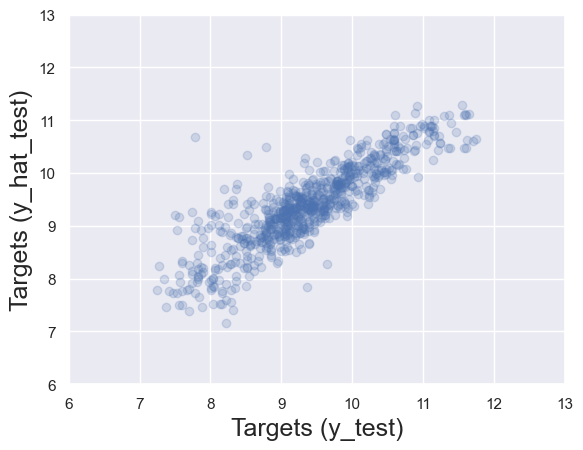

In [68]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel("Targets (y_test)", size=18)
plt.ylabel("Targets (y_hat_test)", size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [69]:
df_pf = pd.DataFrame(y_hat_test, columns=["Pred"])
df_pf

,Pred
0,9.271691
1,11.098869
2,10.595037
3,10.531479
4,9.333536
...,...
769,8.736289
770,9.283874
771,9.286928
772,10.238854


In [70]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=["Pred"])
df_pf

,Pred
0,10632.718122
1,66096.346865
2,39936.126655
3,37476.847521
4,11311.061245
...,...
769,6224.751884
770,10763.045753
771,10795.973262
772,27969.043761


In [72]:
df_pf["Target"] = np.exp(y_test)
df_pf.head()

,Pred,Target
0,10632.718122,NaN
1,66096.346865,7900.0
2,39936.126655,NaN
3,37476.847521,NaN
4,11311.061245,NaN


In [74]:
y_test = y_test.reset_index(drop=True)

In [75]:
y_test.head()

0     7.740664
1    11.362103
2    10.596610
3    10.896739
4     9.121509
Name: Log Price, dtype: float64

In [76]:
df_pf["Target"] = np.exp(y_test)
df_pf.head()

,Pred,Target
0,10632.718122,2300.0
1,66096.346865,86000.0
2,39936.126655,39999.0
3,37476.847521,54000.0
4,11311.061245,9150.0


In [77]:
df_pf["residual"] =  df_pf["Target"] - df_pf["Pred"]

In [78]:
df_pf.head()

,Pred,Target,residual
0,10632.718122,2300.0,-8332.718122
1,66096.346865,86000.0,19903.653135
2,39936.126655,39999.0,62.873345
3,37476.847521,54000.0,16523.152479
4,11311.061245,9150.0,-2161.061245


In [80]:
df_pf["Diff %"] = np.absolute(df_pf["residual"]/df_pf["Target"] * 100)

In [81]:
df_pf.describe()

,Pred,Target,residual,Diff %
count,774.000000,774.000000,774.000000,774.000000
mean,15913.463049,17606.798979,1693.335930,38.120540
std,12984.279973,18770.801170,10330.975425,79.935067
min,1285.275245,1400.000000,-41468.757092,0.157187
25%,7509.860666,6912.500000,-2160.682400,11.220852
50%,11676.293225,11105.500000,85.801823,23.968599
75%,19740.543983,20500.000000,3073.457664,39.717132
max,79464.425546,126000.000000,84374.580325,1727.864879


In [82]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=["Diff %"])

,Pred,Target,residual,Diff %
2,39936.13,39999.00,62.87,0.16
379,17830.54,17800.00,-30.54,0.17
591,3909.02,3900.00,-9.02,0.23
648,21387.35,21335.00,-52.35,0.25
698,30577.35,30500.00,-77.35,0.25
...,...,...,...,...
485,9653.72,1900.00,-7753.72,408.09
533,9936.96,1800.00,-8136.96,452.05
451,36410.93,6500.00,-29910.93,460.17
639,31000.49,4999.00,-26001.49,520.13
